#**Install Requirement Library**

In [3]:
!pip install anytree
!pip install basemap
!pip install mycolorpy
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3851 sha256=e035b7ed07288589b9477c19add85c313aa5762d71e8d20d7431cd004340f89d
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [4]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [5]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"
# Load each dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv")

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the merged DataFrame
merged_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-18T20:54:33.750Z,28.239,56.683,33.0,4.6,mb,NaN,NaN,NaN,0.9,...,2014-11-07T00:41:24.357Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,24.0,reviewed,us,us
1,1987-12-18T16:24:03.050Z,28.191,56.677,19.8,5.9,mw,NaN,NaN,NaN,1.0,...,2022-04-27T21:27:51.633Z,"117 km NNE of Bandar Abbas, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1987-11-30T03:12:37.000Z,30.990,51.170,37.7,4.8,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:41:16.294Z,"53 km NW of Yasuj, Iran",earthquake,NaN,8.0,NaN,32.0,reviewed,us,us
3,1987-11-27T08:26:43.780Z,32.691,59.100,33.0,4.7,mb,NaN,NaN,NaN,0.7,...,2020-08-28T21:42:24.936Z,Eastern Iran,earthquake,NaN,NaN,NaN,26.0,reviewed,us,us
4,1987-11-25T22:53:29.970Z,28.231,56.753,33.0,4.5,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:41:15.759Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,11.0,reviewed,us,us


In [6]:
df = merged_df

In [10]:
data_gempa = merged_df
# Mengubah kolom "time" menjadi tipe data datetime
data_gempa['time'] = pd.to_datetime(data_gempa['time'])

# Memisahkan kolom "time" menjadi dua kolom terpisah: "date" dan "time"
data_gempa['date'] = data_gempa['time'].dt.date
data_gempa['time'] = data_gempa['time'].dt.time

# Mengonversi kolom "time" menjadi string dengan format HH:MM:SS
data_gempa['time'] = data_gempa['time'].apply(lambda x: x.strftime('%H:%M:%S'))

selected_columns = ['time','date', 'latitude', 'longitude', 'place' ,'depth', 'mag', 'magType', 'type']
data_gempa = data_gempa.loc[:, selected_columns]

# Menampilkan lima baris pertama setelah pemisahan
data_gempa.head(5)

,time,date,latitude,longitude,place,depth,mag,magType,type
0,20:54:33,1987-12-18,28.239,56.683,"115 km S of K?h Sef?d, Iran",33.0,4.6,mb,earthquake
1,16:24:03,1987-12-18,28.191,56.677,"117 km NNE of Bandar Abbas, Iran",19.8,5.9,mw,earthquake
2,03:12:37,1987-11-30,30.990,51.170,"53 km NW of Yasuj, Iran",37.7,4.8,mb,earthquake
3,08:26:43,1987-11-27,32.691,59.100,Eastern Iran,33.0,4.7,mb,earthquake
4,22:53:29,1987-11-25,28.231,56.753,"115 km S of K?h Sef?d, Iran",33.0,4.5,mb,earthquake


#**Feature Description**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            3879 non-null   object 
 1   latitude        3879 non-null   float64
 2   longitude       3879 non-null   float64
 3   depth           3879 non-null   float64
 4   mag             3879 non-null   float64
 5   magType         3879 non-null   object 
 6   net             3879 non-null   object 
 7   id              3879 non-null   object 
 8   updated         3879 non-null   object 
 9   type            3879 non-null   object 
 10  status          3879 non-null   object 
 11  locationSource  3879 non-null   object 
 12  magSource       3879 non-null   object 
 13  date            3879 non-null   object 
dtypes: float64(4), object(10)
memory usage: 424.4+ KB


# **Univariate analysis**

<ipython-input-12-a7ed5b28579e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


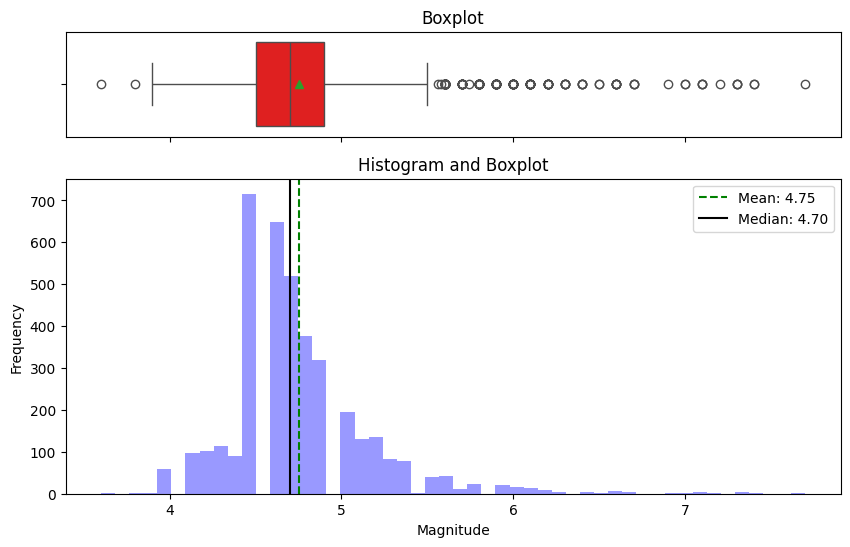

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(10, 6))

    sns.boxplot(mycol, ax=ax_box, showmeans=True, color='red', orient='h')
    sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')

    mean_val = np.mean(mycol)
    median_val = np.median(mycol)

    ax_hist.axvline(mean_val, color='g', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='black', linestyle='-', label=f'Median: {median_val:.2f}')

    ax_hist.legend()

    ax_box.set(ylabel='')
    ax_hist.set(title='Histogram and Boxplot', xlabel='Magnitude', ylabel='Frequency')
    ax_box.set_title('Boxplot', fontsize=12)

    plt.show()

# Apply the function to the earthquake magnitude data
hist_box(data_gempa.mag)

<ipython-input-12-a7ed5b28579e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


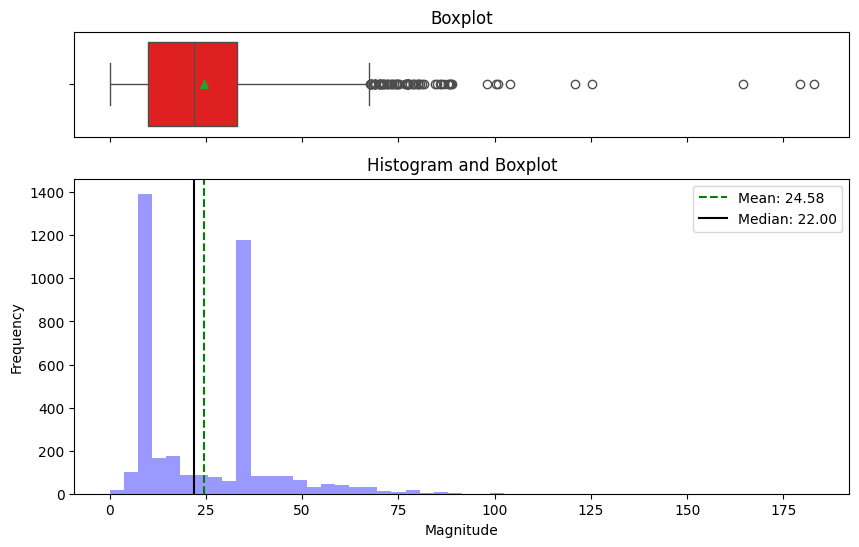

In [13]:
hist_box(data_gempa.depth)

#**Categorical Variable**

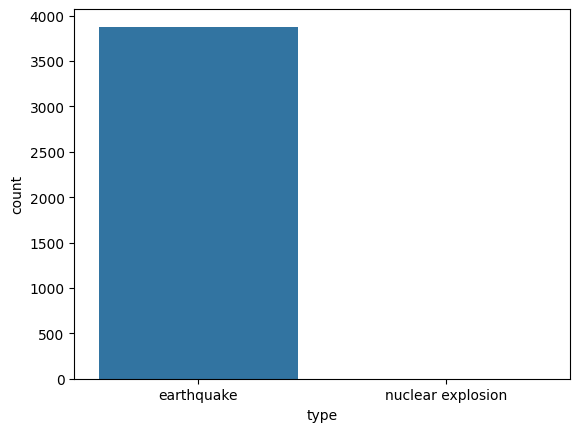

In [14]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='type', data=data_gempa)
plt.show()

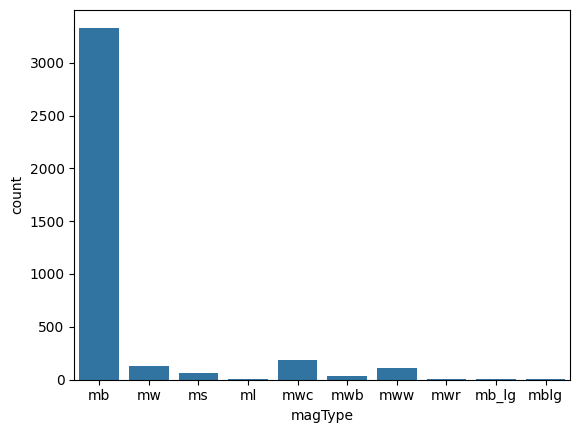

In [15]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='magType', data=data_gempa)
plt.show()

# **Multi-variate Analysis**

In [16]:
# slice out the numerical variabales from dataset to check the correlation between the numericals.
fit_num = data_gempa.select_dtypes(include='float64')
fit_num.head()

,latitude,longitude,depth,mag
0,28.239,56.683,33.0,4.6
1,28.191,56.677,19.8,5.9
2,30.990,51.170,37.7,4.8
3,32.691,59.100,33.0,4.7
4,28.231,56.753,33.0,4.5


In [17]:
corr = fit_num.corr()
corr

,latitude,longitude,depth,mag
latitude,1.000000,-0.503303,-0.024206,0.017068
longitude,-0.503303,1.000000,0.059371,0.083371
depth,-0.024206,0.059371,1.000000,0.121310
mag,0.017068,0.083371,0.121310,1.000000


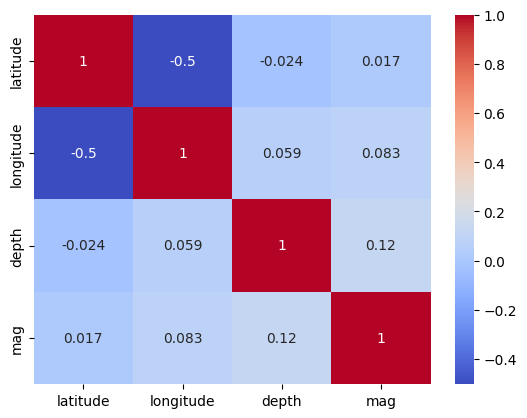

In [18]:
# plot the heatmap to analyse the correlation between all the numerical variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

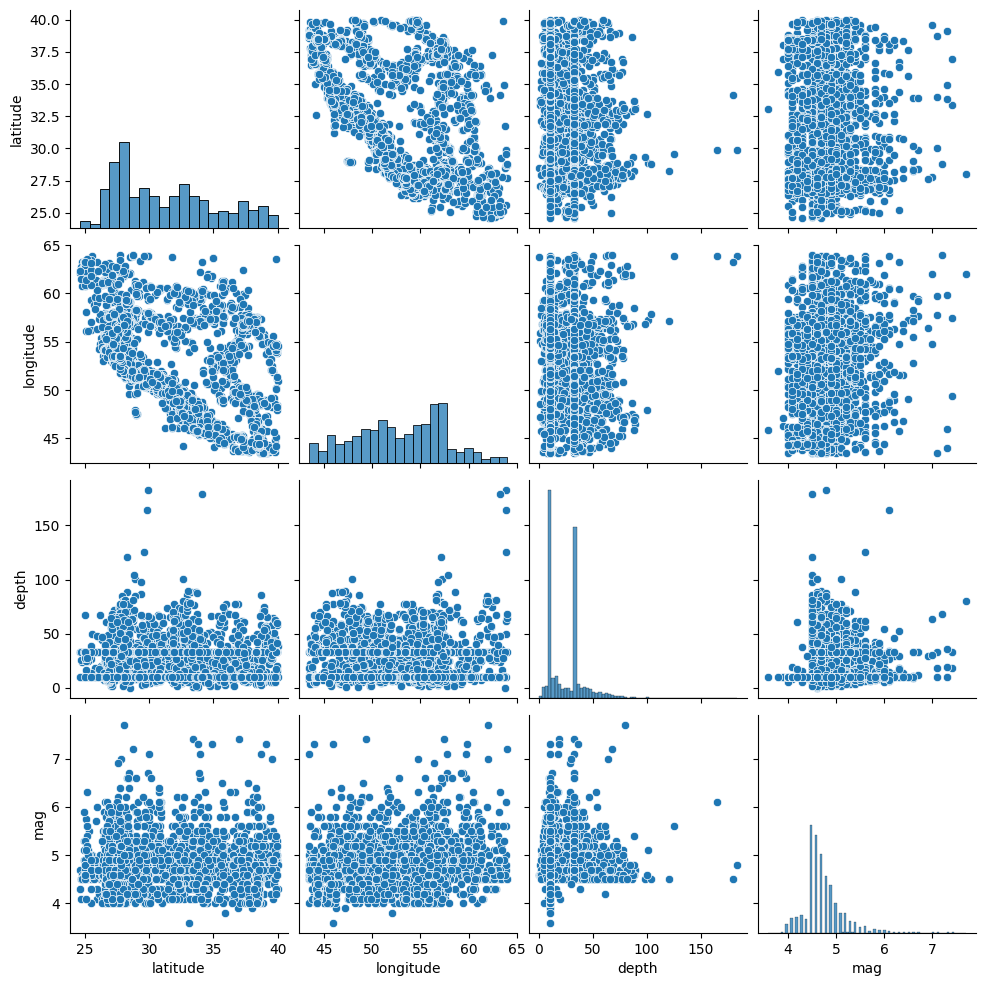

In [19]:
# Looking at relations between the numerical variables
sns.pairplot(data_gempa)

#**Statistical Description**

In [20]:
# Total earthquake events
N_tot = df['mag'].count()
print('Total earthquake events **1972 until 2022**', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2022-1972+1)),2) )
print('Average number of events per year:', round(N_tot/((2022-1972+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time']].sort_values('mag',ascending=False).head(5)

Total earthquake events **1972 until 2022** 3879
Average number of events per week: 1.46
Average number of events per year: 76.06
The magnitude of the largest earthquake:


,mag,time
2194,7.7,10:44:20
1517,7.4,21:00:09
564,7.4,15:35:56
1894,7.3,18:18:17
1063,7.3,07:57:29


In [21]:
print('Magnitude Maximum:', df['mag'].max())
print('Magnitude Minium:', df['mag'].min())
print('Magnitude Rata-Rata:', df['mag'].mean())

Magnitude Maximum: 7.7
Magnitude Minium: 3.6
Magnitude Rata-Rata: 4.751972157772622


In [24]:
# Concatenate the datasets
merged_dff = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = merged_dff[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df = df_selected_columns
df.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1987-12-18T20:54:33.750Z,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us
1,1987-12-18T16:24:03.050Z,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv
2,1987-11-30T03:12:37.000Z,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us
3,1987-11-27T08:26:43.780Z,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us
4,1987-11-25T22:53:29.970Z,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us
5,1987-11-24T13:15:29.310Z,32.402,58.890,33.0,4.6,mb,us,usp0003afd,2014-11-07T00:41:15.063Z,earthquake,reviewed,us,us
6,1987-11-24T11:23:16.900Z,32.658,59.105,40.6,5.3,mw,us,usp0003af8,2022-04-27T21:30:18.808Z,earthquake,reviewed,us,hrv
7,1987-11-09T16:43:42.250Z,32.805,47.799,42.1,4.9,mb,us,usp0003a0e,2014-11-07T00:41:12.852Z,earthquake,reviewed,us,us
8,1987-11-03T14:26:41.410Z,28.420,50.439,10.0,4.6,mb,us,usp00039v1,2014-11-07T00:41:11.061Z,earthquake,reviewed,us,us
9,1987-10-28T21:47:25.220Z,27.627,56.374,45.8,4.7,mb,us,usp00039q3,2014-11-07T00:41:07.614Z,earthquake,reviewed,us,us


In [26]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

<ipython-input-26-8ce4cf583d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_time'] = df['time'].apply(lambda x:
<ipython-input-26-8ce4cf583d54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
<ipython-input-26-8ce4cf583d54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

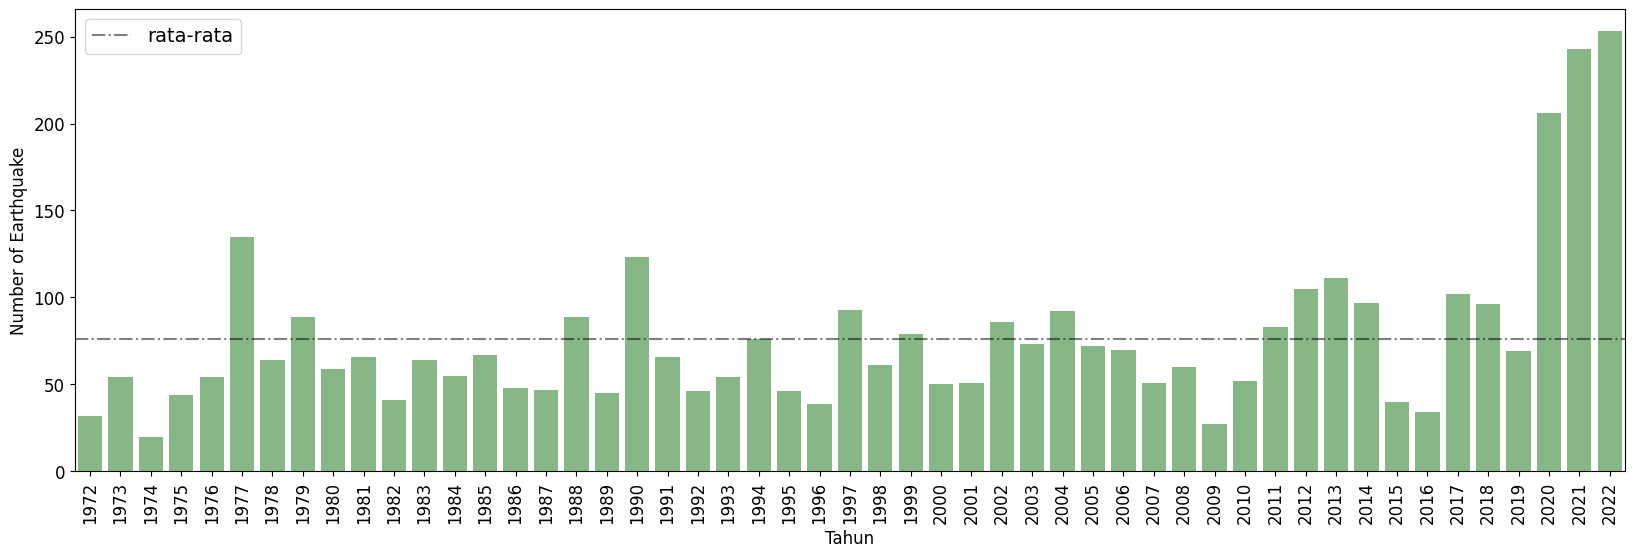

In [27]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(20,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


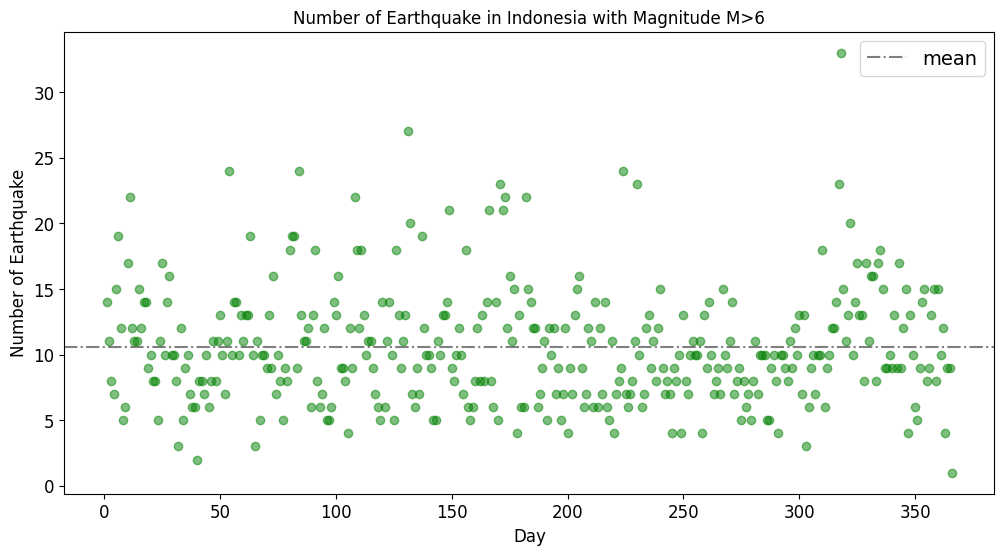

In [28]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in Indonesia with Magnitude M>6')
plt.legend()
plt.show()

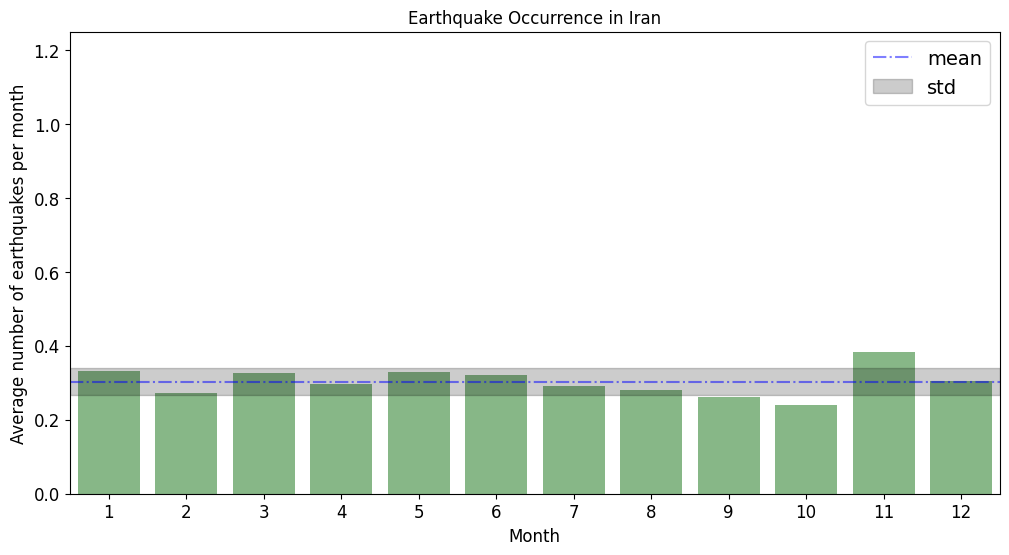

In [29]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 1.25])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Average number of earthquakes per month'), plt.xlabel('Month')
plt.title('Earthquake Occurrence in Iran')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [30]:
import pandas as pd
import folium

# Baca dataset ke dalam DataFrame
df = df

# Menentukan batas geografis berdasarkan data gempa di Iran
max_lat_iran = 39
min_lat_iran = 25
max_lon_iran = 62
min_lon_iran = 44

# Filter data hanya untuk wilayah Iran
df_iran = df[(df['latitude'] >= min_lat_iran) & (df['latitude'] <= max_lat_iran) &
             (df['longitude'] >= min_lon_iran) & (df['longitude'] <= max_lon_iran)]

# Hitung tengah wilayah data gempa di Iran
center_lat_iran = (max_lat_iran + min_lat_iran) / 2
center_lon_iran = (max_lon_iran + min_lon_iran) / 2

# Hitung tingkat zoom yang sesuai untuk memfokuskan pada wilayah dengan data gempa di Iran
zoom_level_iran = 6

# Buat peta dengan lokasi tengah wilayah data gempa di Iran
m_iran = folium.Map(location=[center_lat_iran, center_lon_iran], zoom_start=zoom_level_iran)

# Tentukan rentang magnitudo dan warna yang sesuai
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Tambahkan marker untuk setiap gempa bumi di Iran pada peta
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data_iran = df_iran[(df_iran['mag'] >= min_mag) & (df_iran['mag'] <= max_mag)]
    for index, row in mag_data_iran.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m_iran)

# Tambahkan legend ke peta dengan bar vertikal di pojok kiri bawah
legend_html = """
     <div style="position: fixed;
                 bottom: 100px; left: 10px; width: 200px; height: 160px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px; text-align:center; padding: 5px;">
     <p><b>Legend</b></p>
     <div style="background-color: blue; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 4-5<br>
     <div style="background-color: green; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 5.1-6<br>
     <div style="background-color: orange; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 6.1-7<br>
     <div style="background-color: red; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 7.1-9<br>
      </div>
     """

m_iran.get_root().html.add_child(folium.Element(legend_html))

# Menyimpan peta di Iran ke file HTML
m_iran.save("iran_earthquake_map.html")

# Tampilkan peta di dalam notebook
m_iran


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-39-5d461a950781>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-39-5d461a950781>:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


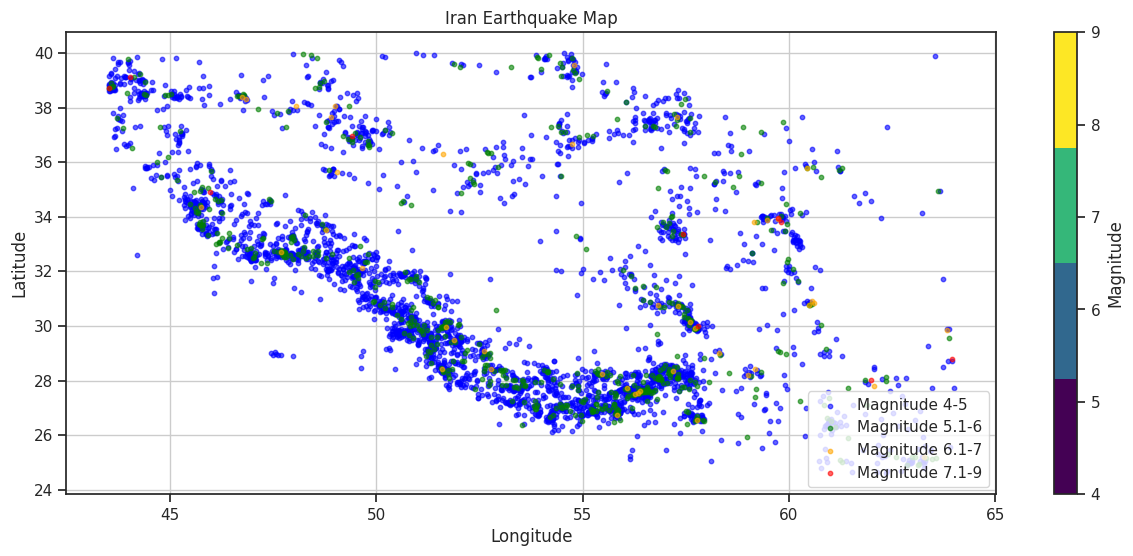

In [39]:
# Membaca dataset
df = df

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(15, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Lable and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Iran Earthquake Map')

# Display Map
plt.grid(True)
plt.show()


#**Frequency**

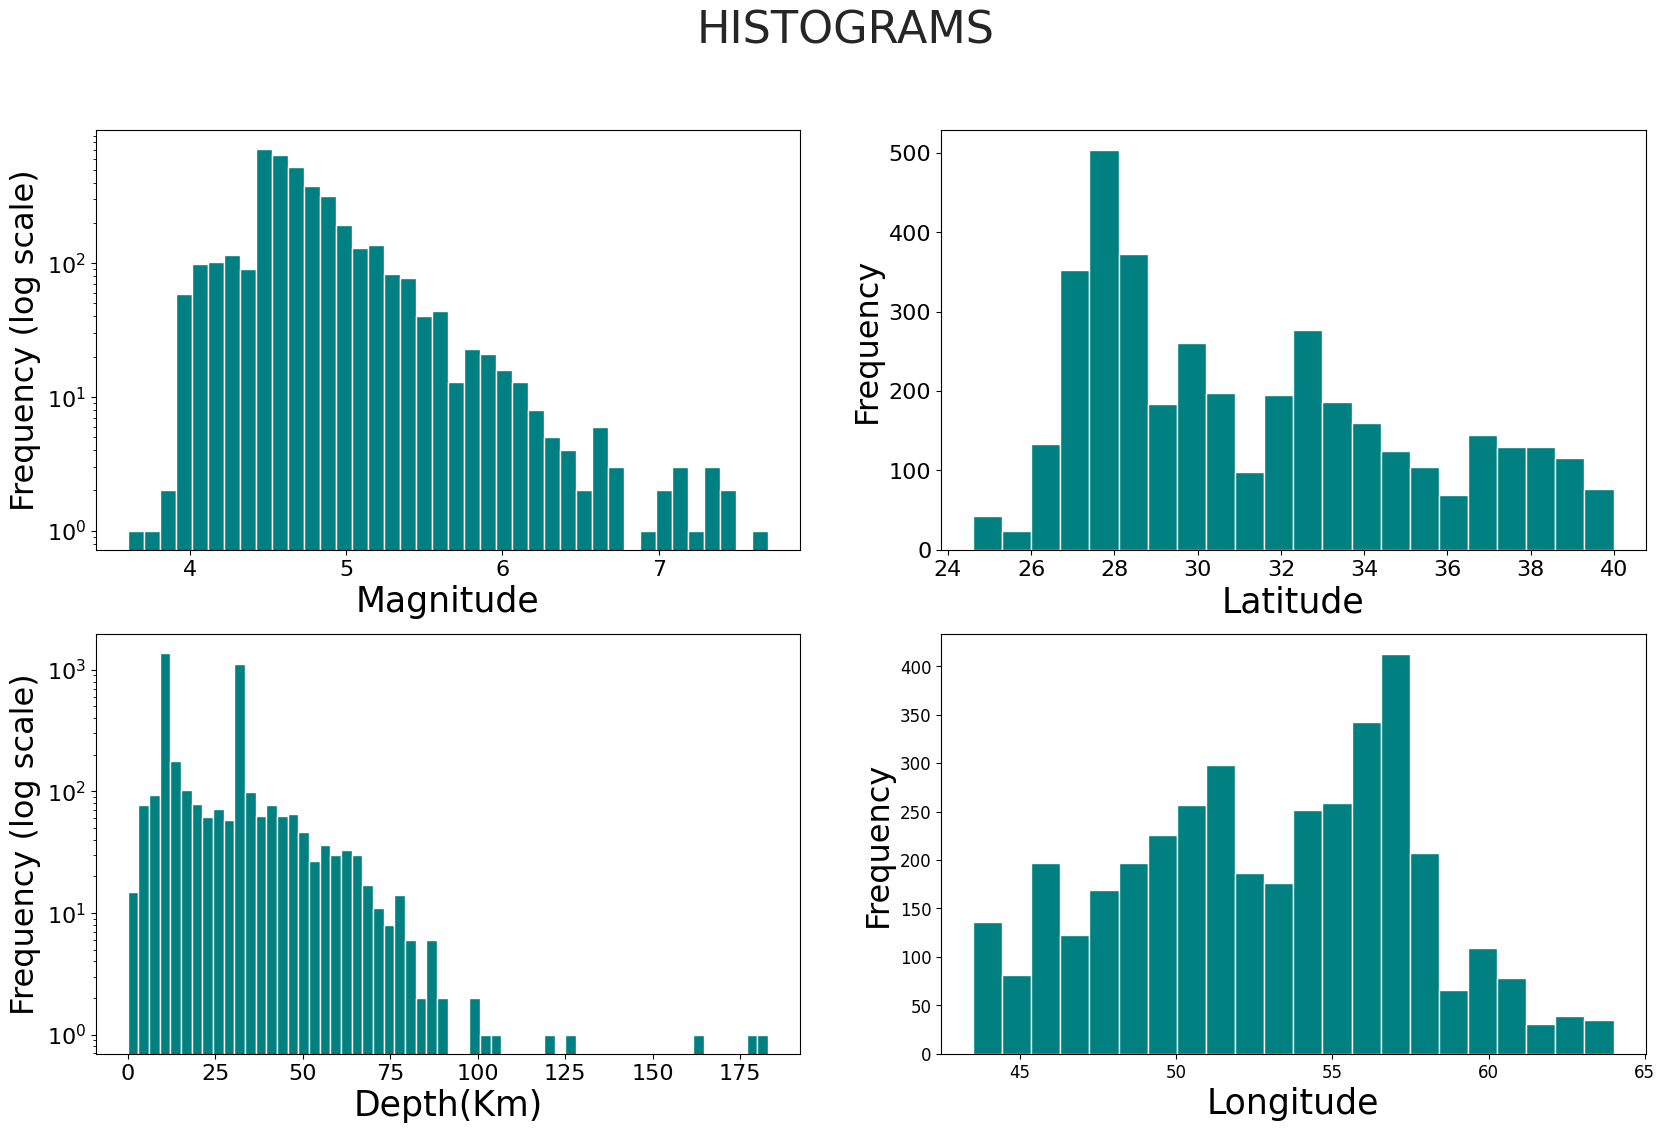

In [32]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


##**Depth, Longitude**

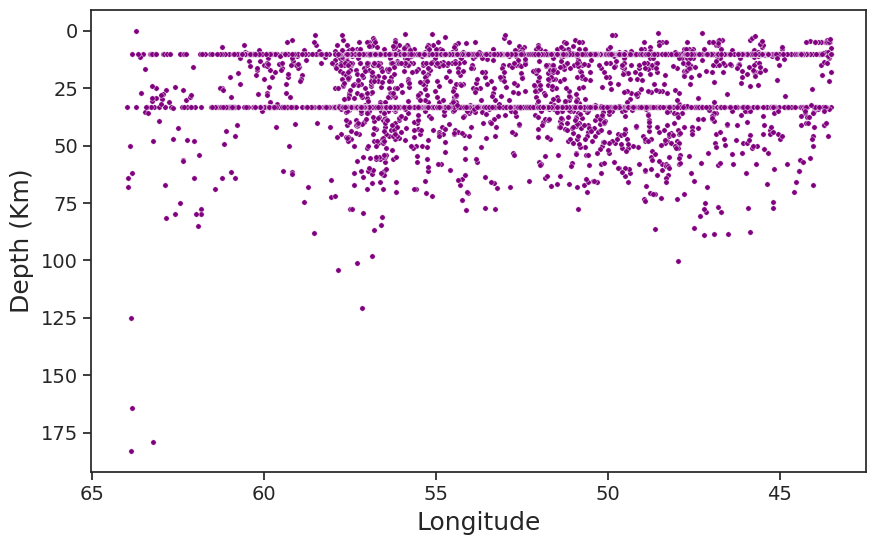

In [33]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Latitude**

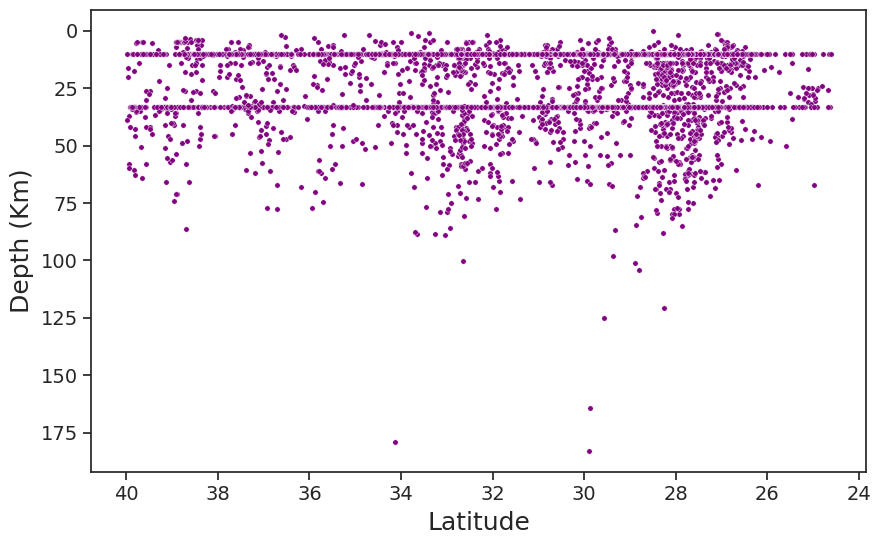

In [34]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

In [35]:
# Read dataset
df = df

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Print the latitude and longitude range
print("Range Latitude:", min_lat, "until", max_lat)
print("Range Longitude:", min_lon, "until", max_lon)


Range Latitude: 24.6025 until 39.9934
Range Longitude: 43.504 until 64.0


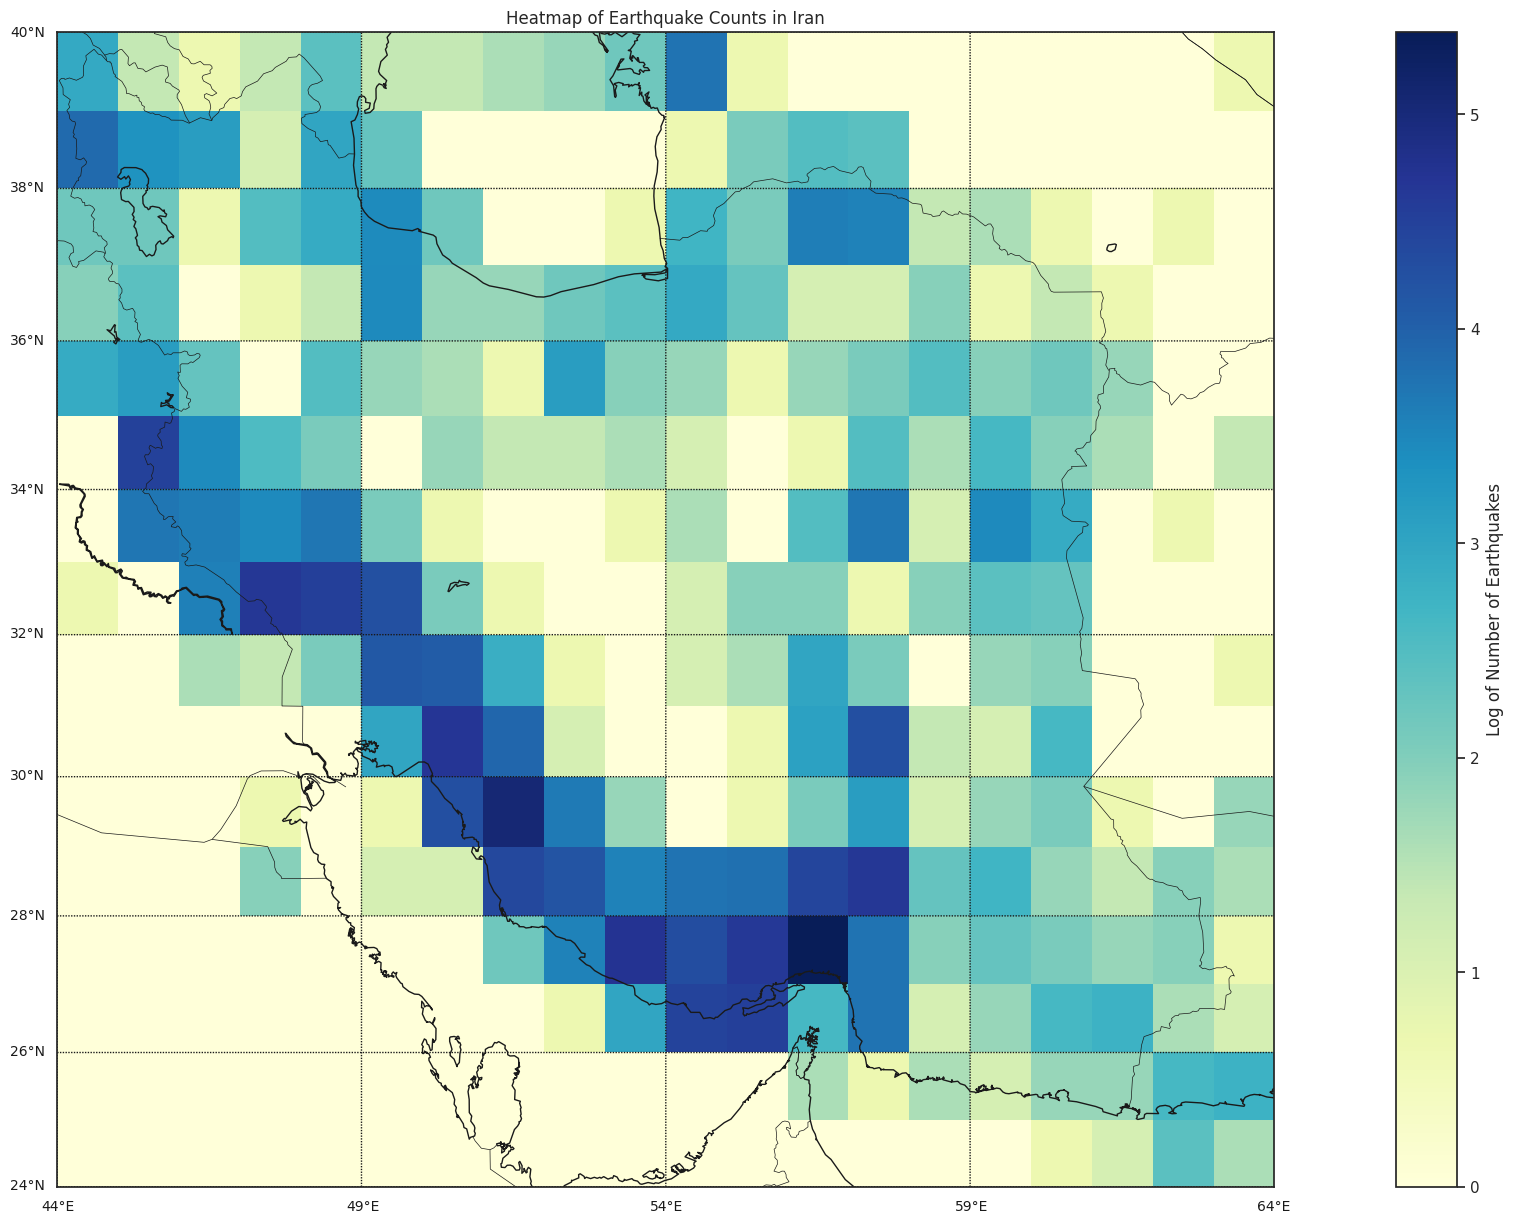

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# URLs of the datasets
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Calculate the latitude and longitude range
min_lat, max_lat = merged_df['latitude'].min(), merged_df['latitude'].max()
min_lon, max_lon = merged_df['longitude'].min(), merged_df['longitude'].max()

# Define the latitude and longitude bins (1x1 degree grid)
lat_bins = np.arange(np.floor(min_lat), np.ceil(max_lat) + 1, 1)
lon_bins = np.arange(np.floor(min_lon), np.ceil(max_lon) + 1, 1)

# Initialize the grid counts
grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

# Calculate the number of earthquakes in each grid cell
for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid cell
        grid_data = merged_df[
            (merged_df['latitude'] >= lat_bins[i]) & (merged_df['latitude'] < lat_bins[i + 1]) &
            (merged_df['longitude'] >= lon_bins[j]) & (merged_df['longitude'] < lon_bins[j + 1])
        ]
        # Count the number of earthquakes in the grid cell
        grid_counts[i, j] = len(grid_data)

# Create a figure
fig, ax = plt.subplots(figsize=(20, 15))

# Create a Basemap instance
m = Basemap(projection='merc',
            llcrnrlat=24, urcrnrlat=40,
            llcrnrlon=44, urcrnrlon=64,
            resolution='i', ax=ax)

# Draw coastlines, countries, and fill continents
m.drawcoastlines()
m.drawcountries()

# Draw meridians/parallels without map boundary
m.drawparallels(range(24, 41, 2), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(range(44, 65, 5), labels=[0, 0, 0, 1], fontsize=10)

# Get the center of each grid cell for plotting
lon_centers = (lon_bins[:-1] + lon_bins[1:]) / 2
lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2

# Plot the heatmap
lon, lat = np.meshgrid(lon_centers, lat_centers)
x, y = m(lon, lat)

# Normalize the grid counts for better visualization
norm_grid_counts = np.log1p(grid_counts)  # Logarithmic scale for better visualization
heatmap = m.pcolormesh(x, y, norm_grid_counts, shading='auto', cmap='YlGnBu')

# Add a colorbar
cbar = m.colorbar(heatmap, location='right', pad='10%')
cbar.set_label('Log of Number of Earthquakes')

# Add a title
plt.title('Heatmap of Earthquake Counts in Iran')

# Save the plot as an image
plt.savefig('earthquake_heatmap_iran.png', bbox_inches='tight')

# Show the plot
plt.show()


In [41]:
import pandas as pd
import numpy as np

# URLs of the datasets
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Calculate the latitude and longitude range
min_lat, max_lat = merged_df['latitude'].min(), merged_df['latitude'].max()
min_lon, max_lon = merged_df['longitude'].min(), merged_df['longitude'].max()

# Define the latitude and longitude bins (1x1 degree grid)
lat_bins = np.arange(np.floor(min_lat), np.ceil(max_lat) + 1, 1)
lon_bins = np.arange(np.floor(min_lon), np.ceil(max_lon) + 1, 1)

# Initialize the grid counts and most frequent place
grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)
grid_places = np.empty((len(lat_bins) - 1, len(lon_bins) - 1), dtype=object)

# Calculate the number of earthquakes and the most frequent place in each grid cell
for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid cell
        grid_data = merged_df[
            (merged_df['latitude'] >= lat_bins[i]) & (merged_df['latitude'] < lat_bins[i + 1]) &
            (merged_df['longitude'] >= lon_bins[j]) & (merged_df['longitude'] < lon_bins[j + 1])
        ]
        # Count the number of earthquakes in the grid cell
        grid_counts[i, j] = len(grid_data)
        # Determine the most frequent place in the grid cell
        if len(grid_data) > 0:
            most_frequent_place = grid_data['place'].mode().iloc[0]
            grid_places[i, j] = most_frequent_place

# Create a summary DataFrame
lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2
lon_centers = (lon_bins[:-1] + lon_bins[1:]) / 2

# Generate a DataFrame for the summary table
summary_data = []
for i in range(len(lat_centers)):
    for j in range(len(lon_centers)):
        if grid_counts[i, j] > 0:  # Exclude cells with zero earthquake counts
            summary_data.append([lat_centers[i], lon_centers[j], grid_counts[i, j], grid_places[i, j]])

summary_df = pd.DataFrame(summary_data, columns=['Latitude', 'Longitude', 'Earthquake_Count', 'Place'])

# Sort the summary DataFrame by Earthquake_Count in descending order
summary_df = summary_df.sort_values(by='Earthquake_Count', ascending=False)

# Save the summary table to a CSV file
summary_df.to_csv('earthquake_summary_iran.csv', index=False)

# Display the summary DataFrame
print(summary_df)


     Latitude  Longitude  Earthquake_Count                           Place
29       27.5       56.5               217                   southern Iran
56       29.5       51.5               155                   southern Iran
26       27.5       53.5               111          40 km NE of Mohr, Iran
68       30.5       50.5               107   15 km SSE of Dogonbadan, Iran
93       32.5       47.5               105       27 km E of Dehlor?n, Iran
..        ...        ...               ...                             ...
155      36.5       47.5                 1          57 km N of Tak?b, Iran
167      36.5       59.5                 1     28 km SSW of Chen?r?n, Iran
169      36.5       61.5                 1        14 km S of Sarakhs, Iran
173      37.5       46.5                 1       45 km ESE of Tabriz, Iran
211      39.5       63.5                 1  28 km SSE of Gazli, Uzbekistan

[212 rows x 4 columns]
